<center>МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ
<center>НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ
<center>"КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ імені Ігоря Сікорського"
<center>Кафедра біомедичної інженерії

<cener>Компʼютерний практикум №6

<center>з дисципліни "Обробка та аналіз біомедичних даних"
<center>на тему "Критерій Стюдента"
<center>14 варіант


<right>виконала:
<br>
<right>студентка групи БС-12
<br>
<right>Сипко В.І
<center>Київ-2023

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns

In [198]:
group_1 = np.random.normal(120, 3, 50)
group_2 = np.random.normal(124, 3, 50)

In [199]:
df = pd.DataFrame({"Group 1": group_1, "Group 2": group_2})
df.head()

,Group 1,Group 2
0,121.979772,125.653028
1,117.950459,129.289202
2,118.993306,114.188055
3,121.918107,118.322147
4,114.092119,124.697458


<Axes: >

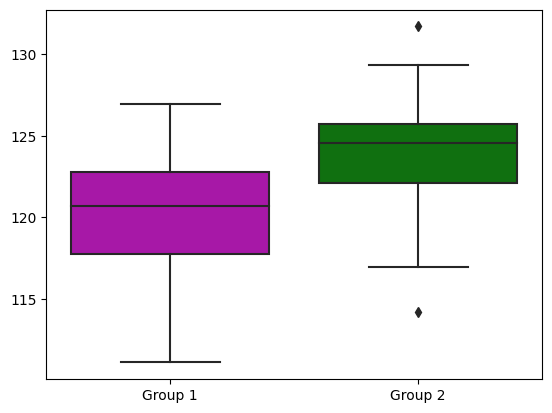

In [200]:
sns.boxplot(data=df, palette=["m", "g"])

In [201]:
pearson_coefs = pd.read_excel("pearson_coefs.xlsx")
pearson_coefs.head()

,df,0.05
0,1,12.700
1,2,4.303
2,3,3.182
3,4,2.776
4,5,2.571


In [232]:
def pearson_coef(data, group_1, group_2):

  if len(data[group_1]) != len(data[group_2]):
    print("Number of experiments in group 1 and group 2 mast be equal.")
    return None

  else:
    n = len(data)
    sum_x2 = sum([i**2 for i in data[group_1]])
    sum_y2 = sum([i**2 for i in data[group_2]])
    sum_xy = sum([data[group_1][i]*data[group_2][i] for i in range(n)])

    up = n*sum_xy - sum(data[group_1])*sum(data[group_2])
    down = ((n*sum_x2 - sum(data[group_1])**2)*(n*sum_y2 - sum(data[group_2])**2)) ** 0.5

    if down == 0:
        return None

    r = round(up/down, 3)

    df_ = n - 2
    for i in range(len(pearson_coefs)):
      if pearson_coefs['df'][i] == df_:
        tabl_r = pearson_coefs[0.05][i] 
        break
    if r < tabl_r:
      print(f"The value of the degree of freedom is {df_}. The correlation coefficient equals {r}, the table value equals {tabl_r}. \n {r} < {tabl_r}, so there is no statistically significant dependency between the groups.")
    else:
      print(f"The correlation coefficient equals {r}, the table value equals {tabl_r}. \n {r} > {tabl_r}, so there is a statistically significant dependency between the groups.")


In [233]:
pearson_coef(df, "Group 1", "Group 2")

The value of the degree of freedom is 48. The correlation coefficient equals 0.043, the table value equals 2.011. 
 0.043 < 2.011, so there is no statistically significant dependency between the groups.


In [231]:
liven_table = pd.read_excel("Таблиця критичних значень для критерію Лівеня.xlsx")
liven_table.head()

,Unnamed: 0,f1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,f2,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,15.00,>15
1,1,161.45,199.50,215.71,224.58,230.16,233.99,236.77,238.88,240.54,241.88,245.95,256.2
2,2,18.51,19.00,19.16,19.25,19.30,19.33,19.35,19.37,19.38,19.40,19.43,20.3
3,3,10.13,9.55,9.28,9.12,9.01,8.94,8.89,8.85,8.81,8.79,8.70,8.6
4,4,7.71,6.94,6.59,6.39,6.26,6.16,6.09,6.04,6.00,5.96,5.86,5.76


In [230]:
student_values = pd.read_excel("student_criterion.xlsx")
student_values.head()

,df,0.05
0,1,0.99692
1,2,0.95000
2,3,0.87830
3,4,0.81140
4,5,0.75450


In [221]:
freedom_degree_stu = 98
for i in range(len(student_values)-2):
  if freedom_degree_stu in range(student_values['df'][i], student_values['df'][i+1]):
    table_value_stu = student_values[0.05][i+1]
    print(table_value_stu)
  elif freedom_degree_stu > 120:
    table_value_stu = 0.087

0.1946


In [216]:
student_values['df'][i+1]

'∞'

In [228]:
def liven_and_student_test(data, group_1, group_2):
  avg1 = sum(data[group_1]) / len(data)
  var1 = sum((i - avg1)**2 for i in data[group_1]) / len(data)

  avg2 = sum(data[group_2]) / len(data)
  var2 = sum((i - avg2)**2 for i in data[group_2]) / len(data)
  
  F = round((var1**2/var2**2 if var1 > var2 else var2**2/var1**2), 2)

  freedom_degree = len(data[group_1]) - 1

  for i in range(len(liven_table)):
    for j in liven_table.columns:
      if freedom_degree == liven_table["Unnamed: 0"][i] and freedom_degree == liven_table[j][0]:
        table_value = liven_table[j][i]
      elif freedom_degree > 20 or freedom_degree > 15:
        table_value = liven_table['Unnamed: 12'][21]
  if F < table_value:
    print(f"The value of the Levene's test equals {F}, this is less than critical value which is {table_value}. So there is no statistical difference in variances.")
    t = abs(np.mean(data[group_1]) - np.mean(data[group_2]))/((var1/len(data[group_1]) + var2/len(data[group_2])))**0.5
  else:
    print(f"The value of the Levene's test equals {F}, this is more than critical value which is {table_value}. So there is a statistical difference in variances.")
    t = abs(np.mean(data[group_1]) - np.mean(data[group_2]))/((len(data[group_1])-1)*var1+(len(data[group_1])-1)*var2) * (1/len(data[group_1]) + 1/len(data[group_2]))/(len(data[group_1])+len(data[group_2])-2)
  
  freedom_degree_stu = len(data[group_1])+len(data[group_2])-2
  
  for i in range(len(student_values)-2):
    if freedom_degree_stu in range(student_values['df'][i], student_values['df'][i+1]):
      table_value_stu = student_values[0.05][i+1]
      print(table_value_stu)
    elif freedom_degree_stu > 120:
      table_value_stu = 0.087
  if t < table_value_stu:
    print(f"The value of Student's t-criterion equals {round(t, 2)}, this is less than critical value which is {table_value_stu}. We can conclude that the averages are statistically equal.")
  else:
    print(f"\nThe value of Student's t-criterion equals {round(t, 2)}, this is more than critical value which is {table_value_stu}. We can conclude that the averages are statistically different.")


In [229]:
liven_and_student_test(df, "Group 1", "Group 2")

The value of the Levene's test equals 1.01, this is less than critical value which is 1.45. So there is no statistical difference in variances.
0.1946

The value of Student's t-criterion equals 5.47, this is more than critical value which is 0.1946. We can conclude that the averages are statistically different.


Висновок: За результатами дослідження була перевірена розбіжність між двома групами, що були згенеровані випадково за нормальним розподілом.
Було сформовано дві гіпотези: 
H0: μ_1 - μ_2 = 0 (різниця між середніми у парних групах за показником, що досліджується рівна 0),
H1: μ_1 - μ_2 != 0 (різниця між середніми у парних групах за показником, що досліджується не рівна 0).
 У кожній групі було проведено 50 експериментів. Між випробуваннями у групах немає залежності, що було доведено розрахунком коефіцієнта кореляції Пірсона. Зважаючи на те, що однією з вимог для використанная данного критерію є однорідність дисперсій, перед проведенням t-критерію Стьюдента для незалежних вибірок було проведено тест Левене, що довів статистичну рівність дисперсій двох груп. В результаті роботи критерію Стьюдента було отримано значення 5.47, що є більшим ніж критичне значення (0.1956). Тому нульову гіпотезу було відхилено і зроблено висновок про статистичну відмінність середніх.